# 0.0. IMPORTS

## 0.1. Import Frameworks

In [183]:
# manipulation
import pandas as pd
import numpy as np
import inflection
from IPython.display       import Image

# plot
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2. Helper Functions

In [184]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()
    
# Plot categorical attributes with annot
def plot_cat(att, annot=True):
    
    splot = sns.countplot(x = att)
    total = 0
    if annot == True:
        for p in splot.patches:
            total += p.get_height()
            
        for p in splot.patches:
            splot.annotate(format(p.get_height()/total, '.4f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', xytext = (0, 10), 
                           textcoords = 'offset points')

# Plot histogram and boxplot to univariate analysis
def plot_dist(att, bins='auto', title=None):
    grid = plt.GridSpec(2, 1)

    plt.subplot(grid[0, 0])
    sns.histplot(x = att, bins=bins)
    plt.title(title)

    plt.subplot(grid[1, 0])
    sns.boxplot(x = att)

In [185]:
jupyter_settings()

## 0.3. Import Data

In [186]:
# data url
url = 'https://raw.githubusercontent.com/tadeucbm/churn_predict/main/data/churn.csv'

# df is data
df = pd.read_csv(url).drop(['RowNumber', 'CustomerId'], axis=1)

In [187]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1.0. DATA DESCRIPTION

In [188]:
# copy df to next section
df1 = df.copy()

## 1.1. Rename Columns

In [189]:
# select columns
cols_old = df1.columns.to_list()

# anonymous function to underscore columns
snakecase = lambda x: inflection.underscore(x)

# create new column names
cols_new = list(map(snakecase, cols_old))

# rename
df1.columns = cols_new

In [190]:
# print columns
df1.columns

Index(['surname', 'credit_score', 'geography', 'gender', 'age', 'tenure',
       'balance', 'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

## 1.2. Data Dimension

In [191]:
# print the number of rows
print(f'Number of rows: {df1.shape[0]}')

# print the number of columns
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 10000
Number of columns: 12


## 1.3. Data Types

In [192]:
# view dtypes
df1.dtypes

surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

In [193]:
# turning binary variables into objects
df1 = df1.astype({'num_of_products': 'object', 'has_cr_card': 'object', 
                  'is_active_member': 'object', 'exited': 'object', 
                  'tenure': 'object'})

## 1.4. Check NA

In [194]:
df1.isna().sum()

surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

## 1.5. Descriptive Statistics

In [195]:
# df with only numerical attributes
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# df with only categorical attributes
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### 1.5.1. Numerical Attributes

In [196]:
# Central Tendency
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
ct = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
ct.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ct

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,credit_score,350.00,850.00,500.00,650.528800,652.000,96.648466,-0.071607,-0.425726
1,age,18.00,92.00,74.00,38.921800,37.000,10.487282,1.011320,1.395347
2,balance,0.00,250898.09,250898.09,76485.889288,97198.540,62394.285254,-0.141109,-1.489412
3,estimated_salary,11.58,199992.48,199980.90,100090.239881,100193.915,57507.617221,0.002085,-1.181518


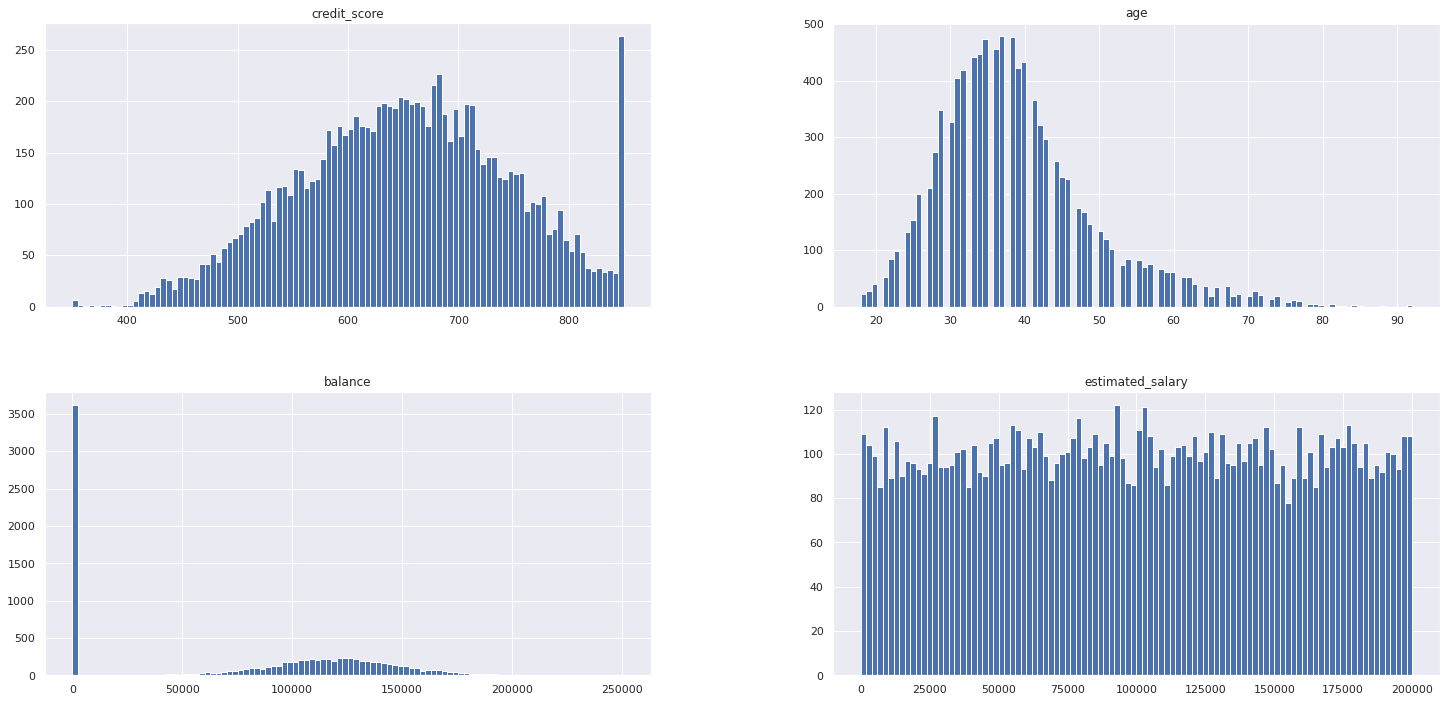

In [197]:
# plot histograms
num_attributes.hist(bins=100);

### 1.5.2. Categorical Attributes

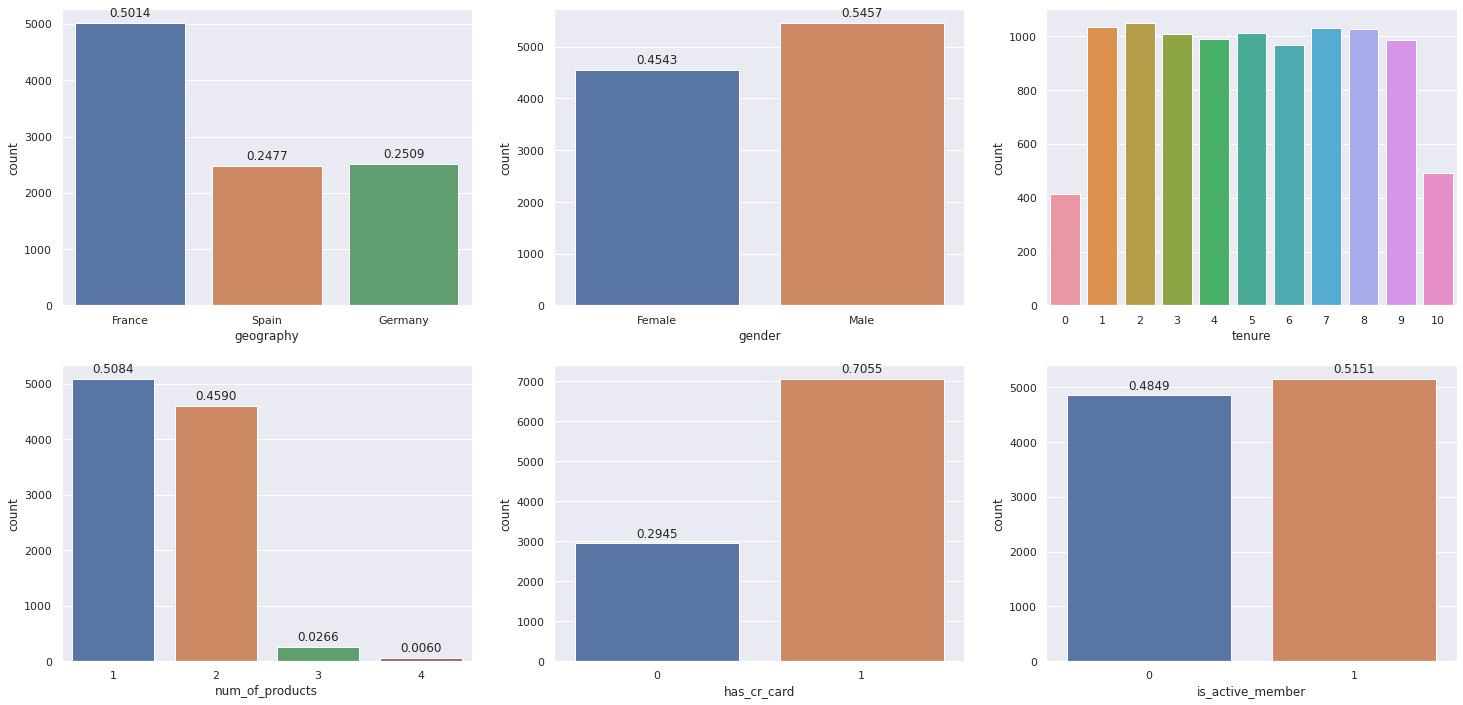

In [198]:
# create grid
grid = plt.GridSpec(2, 3)

# print countplot geography
plt.subplot(grid[0, 0])
plot_cat(cat_attributes['geography'])

# print countplot gender
plt.subplot(grid[0, 1])
plot_cat(cat_attributes['gender'])

# print countplot tenure
plt.subplot(grid[0, 2])
plot_cat(cat_attributes['tenure'], annot=False)

# print countplot num_of_products
plt.subplot(grid[1, 0])
plot_cat(cat_attributes['num_of_products'])

# print countplot has_cr_card
plt.subplot(grid[1, 1])
plot_cat(cat_attributes['has_cr_card'])

# print countplot is_active_member
plt.subplot(grid[1, 2])
plot_cat(cat_attributes['is_active_member'])

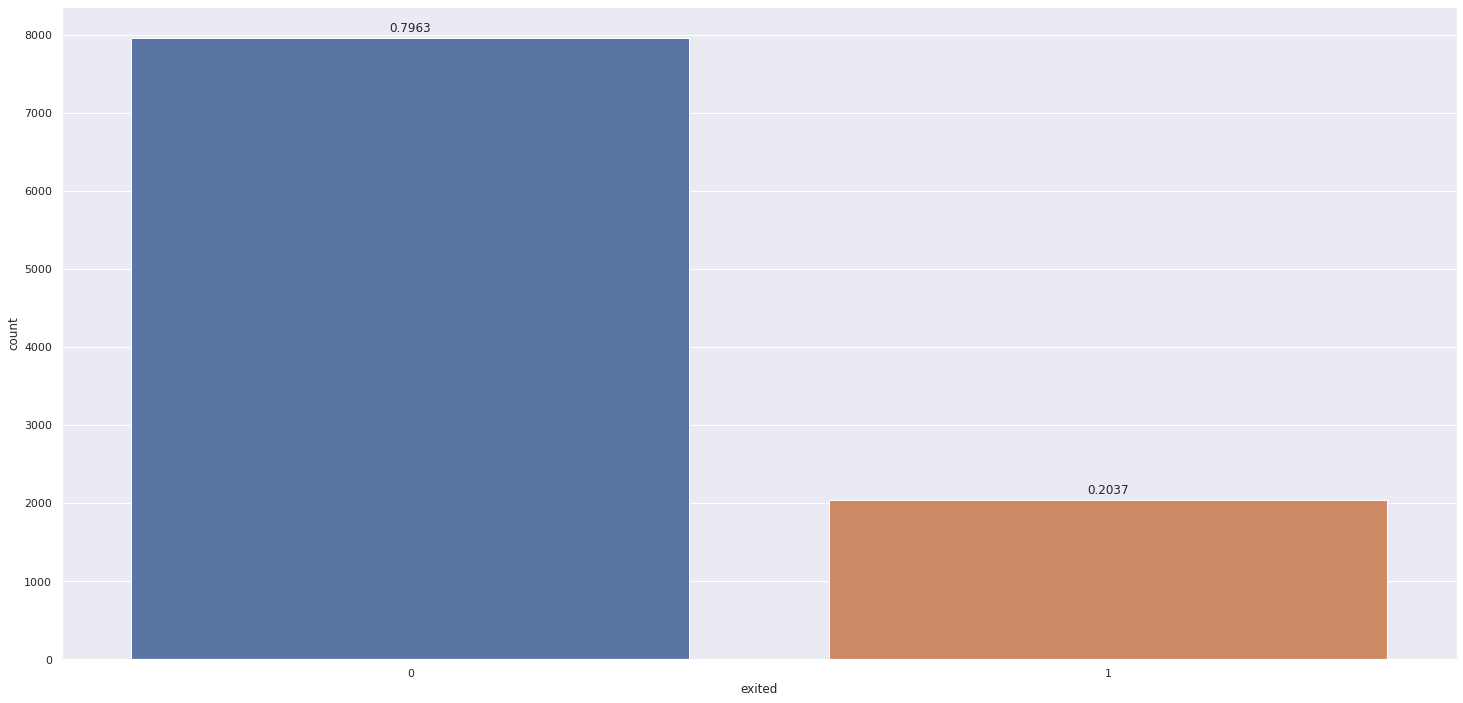

In [199]:
# variable target
plot_cat(cat_attributes['exited'])

obs: very umbalaced variable response

# 2.0. FEATURE ENGINEERING

In [200]:
df2 = df1.copy()

## 2.1. Hypothesis MindMap

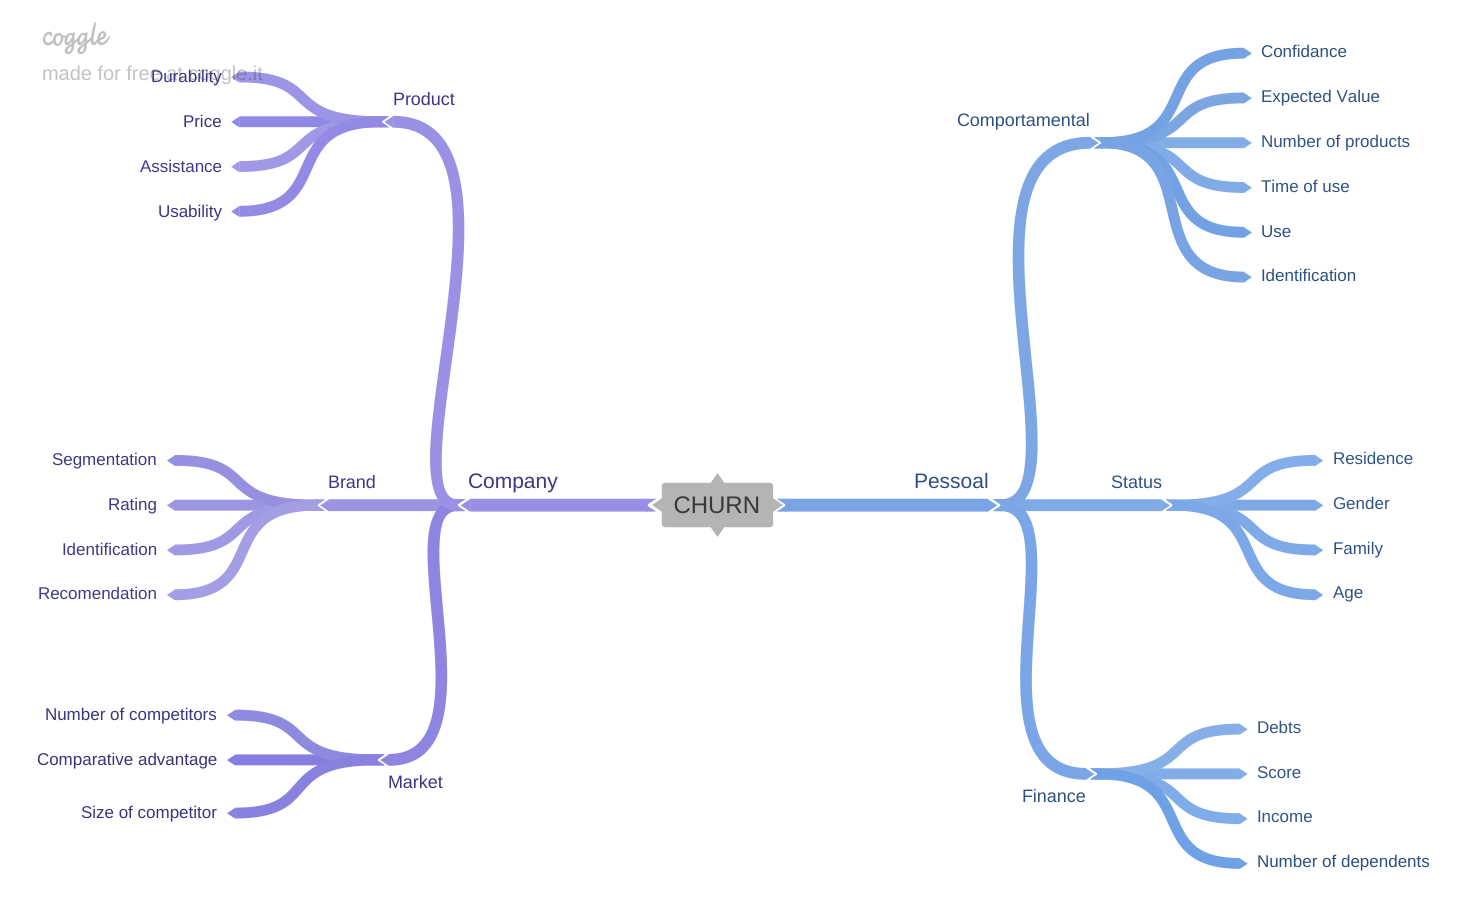

In [201]:
img_url = 'https://raw.githubusercontent.com/tadeucbm/churn_predict/main/image/CHURN.png'
Image(img_url)

## 2.2. Creation of Hypotheses

### 2.2.1. Hipóteses Comportamentais
**1**. Old customers have a lower dropout rate than new customers.;

**2**. Customers with more products evade less;

**3**. Customers with a greater number of products tend to have a lower churn;

**4**. Customers with a greater number of products and longer usage times have lower than normal churn;

**5**. Customer with credit card tend to have less churn;

**6**. Longer credit card customers tend to have a lower churn;

**7**. Active customers tend to have a lower churn.


### 2.2.2. Hipóteses de Status
**1**. The country of residence of the customer impacts the churn rate;

**2**. The gender of the customer has no relation with the churn rate;

**3**. Older people tend to churn.


### 2.2.3. Hipóteses de Finança
**1**. Indebted people do not churn;

**2**. Customers with a high score and low amount of money on account tend to churn;

**3**. People with a high salary and a low amount of money on account tend to churn.


### 2.2.4. Hipóteses Pessoal
**1**. Non-active customers who do not have a credit card tend to churn more than non-active customers with a credit card;

**2**. Younger credit card customers tend to churn less;

**3**. Customers with a lower salary and with a credit card tend to churn less;

**4**. People who have spent a higher percentage of life as a customer tend to churn less.

## 2.3. Hypothesis Final List

**1**. Old customers have a lower dropout rate than new customers.;

**2**. Customers with more products evade less;

**3**. Customers with a greater number of products and longer usage times have lower than normal churn;

**4**. Customer with credit card tend to have less churn;

**5**. Longer credit card customers tend to have a lower churn;

**6**. Active customers tend to have a lower churn.

**7**. The country of residence of the customer impacts the churn rate;

**8**. The gender of the customer has no relation with the churn rate;

**9**. Older people tend to churn.

**10**. Indebted people do not churn;

**11**. Customers with a high score and low amount of money on account tend to churn;

**12**. People with a high salary and a low amount of money on account tend to churn.

**13**. Non-active customers who do not have a credit card tend to churn more than non-active customers with a credit card;

**14**. Younger credit card customers tend to churn less;

**15**. Customers with a lower salary and with a credit card tend to churn less;

**16**. People who have spent a higher percentage of life as a customer tend to churn less.

## 2.4. Feature Engineering

In [202]:
# percentage of life the person is a customer
df2['perc_tenure'] = df2['tenure'] / df2['age']

# comparison between score and money account
df2['score_account'] = df2['balance'] / df2['credit_score']

# creating classes for the score 
df2['score_class'] = df2['credit_score'].apply(lambda x: 'high_risk' if x < 500 else
                                                         'med_risk' if x >= 500 and x < 700 else
                                                         'low_risk' if x >= 700 and x < 800 else
                                                         'very_low_risk')

# 3.0. EXPLORATORY DATA ANALYSIS 

In [203]:
df3 = df2.copy()

## 3.1. Univariate Analysis

### 3.1.1. Response Variable 
- The response variable is unbalanced;

- 79.6% not churn and 20.4% churn

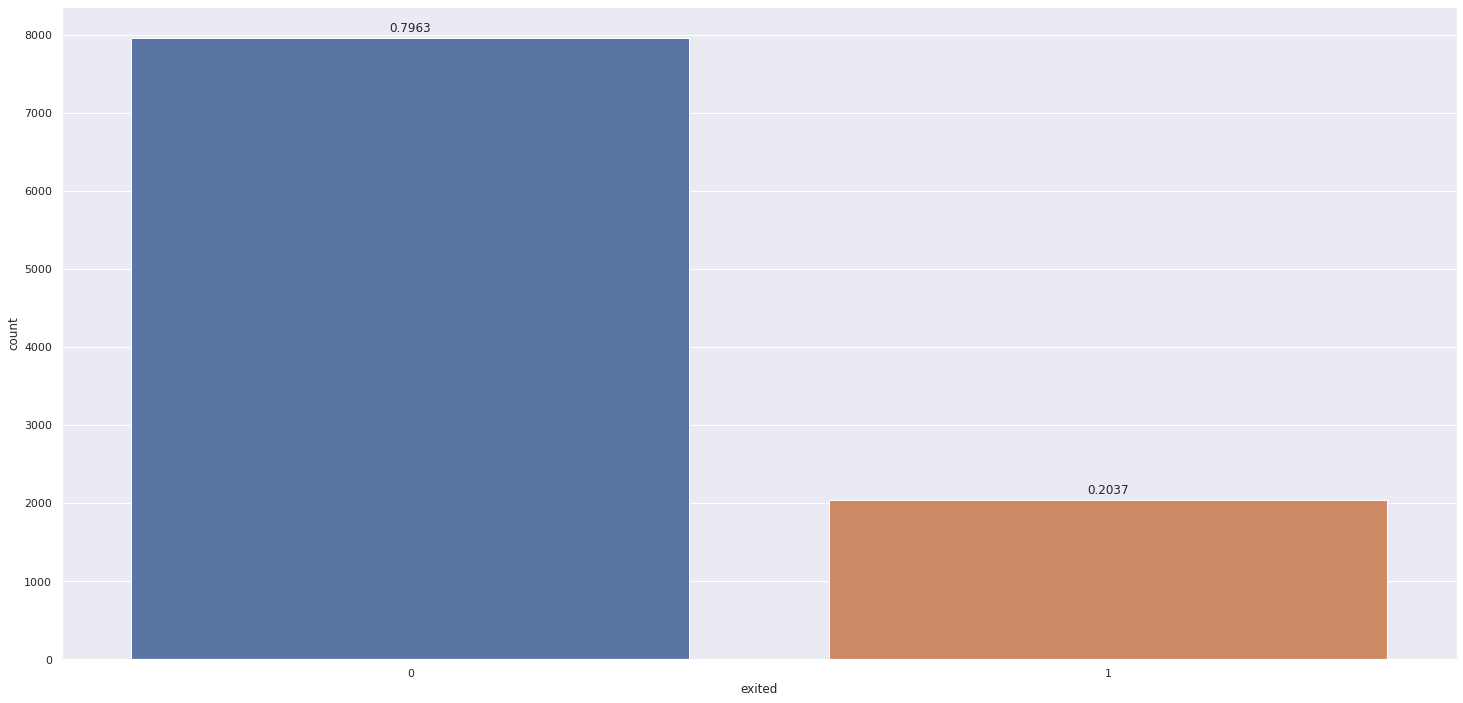

In [204]:
plot_cat(df3['exited'])

### 3.1.2. Numerical Variables

#### 3.1.2.1 Credit Score
- Credit_score is a variable that approaches a normal distribution,

- There are many entries with the maximum value

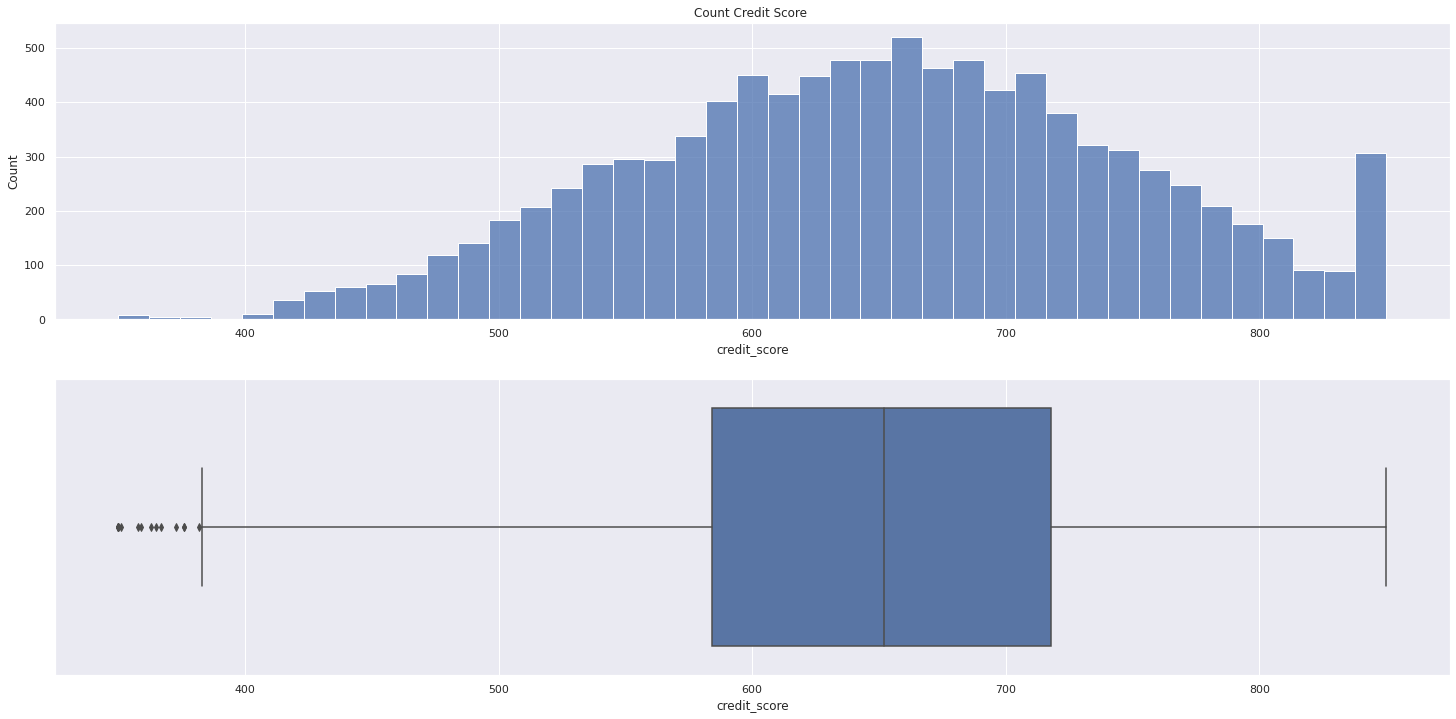

In [205]:
plot_dist(df3['credit_score'], title='Count Credit Score ')

#### 3.1.2.2 Age
- The skew of the variable age is positive

- Elderly people are outliers

- Some values of age stand out with high values

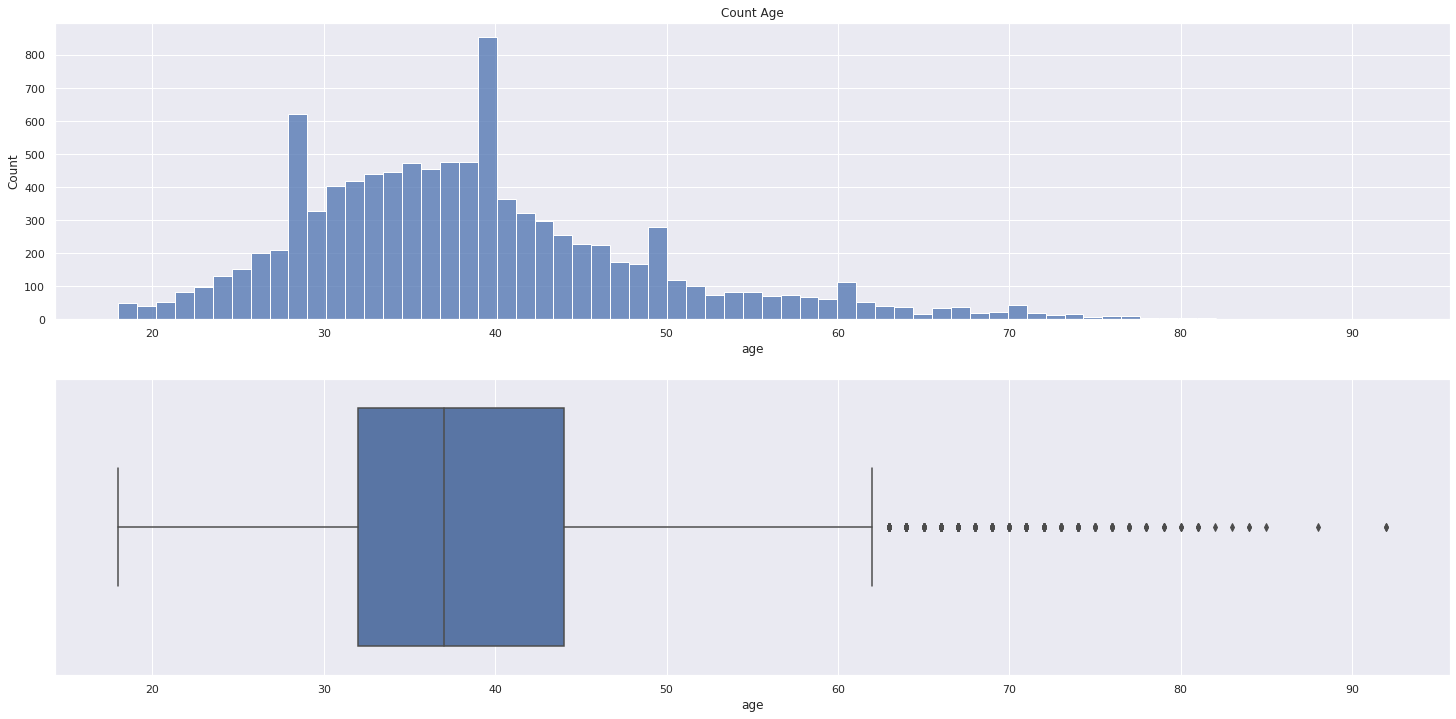

In [206]:
plot_dist(df3['age'], title='Count Age')

#### 3.1.2.3 Balance
- 36% of values are 0 and 64% of values are > 0

- The distribution of the balance variable approach to normal, when without 0 values

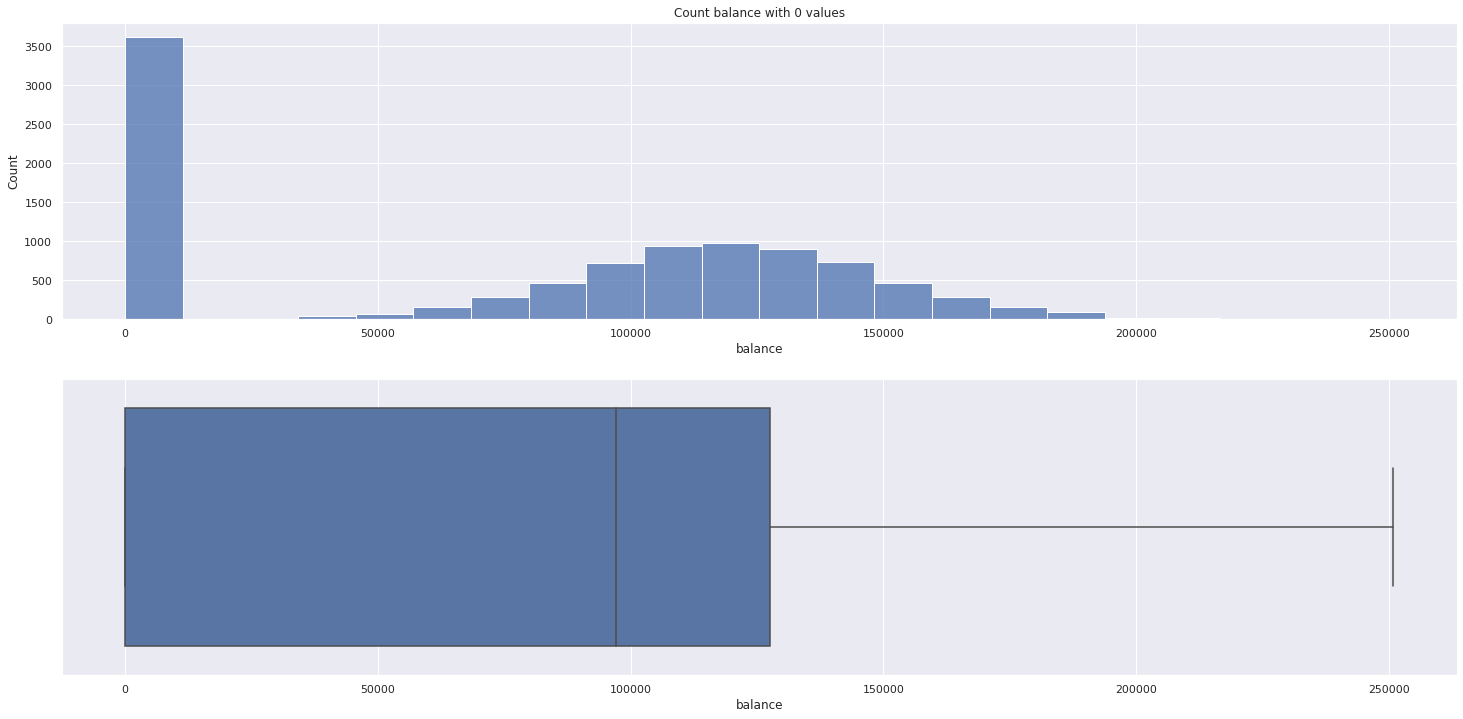

In [207]:
# plot balance with 0 balance values
plot_dist(df3['balance'], title='Count balance with 0 values')

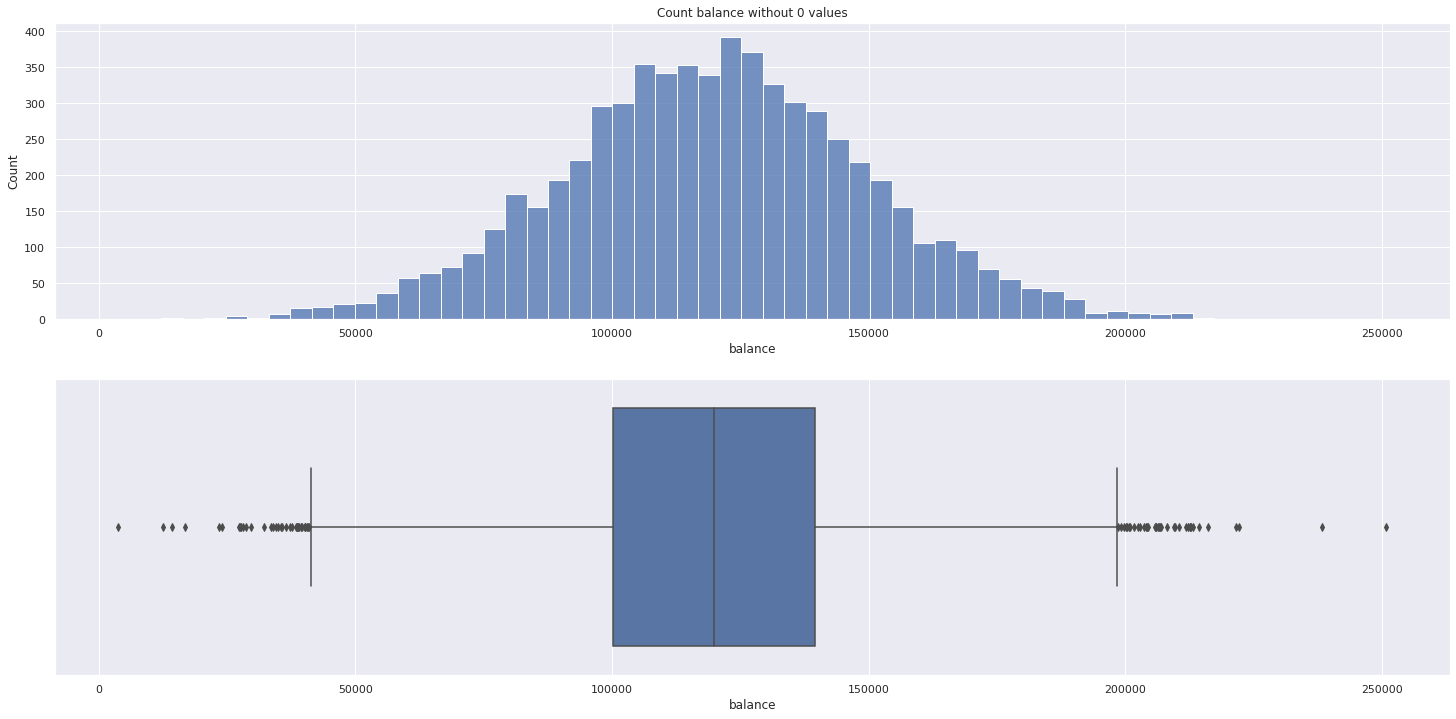

In [208]:
# histogram and boxplot of balance without 0 values
aux_2 = df3.loc[df3['balance'] > 0, 'balance']
plot_dist(aux_2, title='Count balance without 0 values')

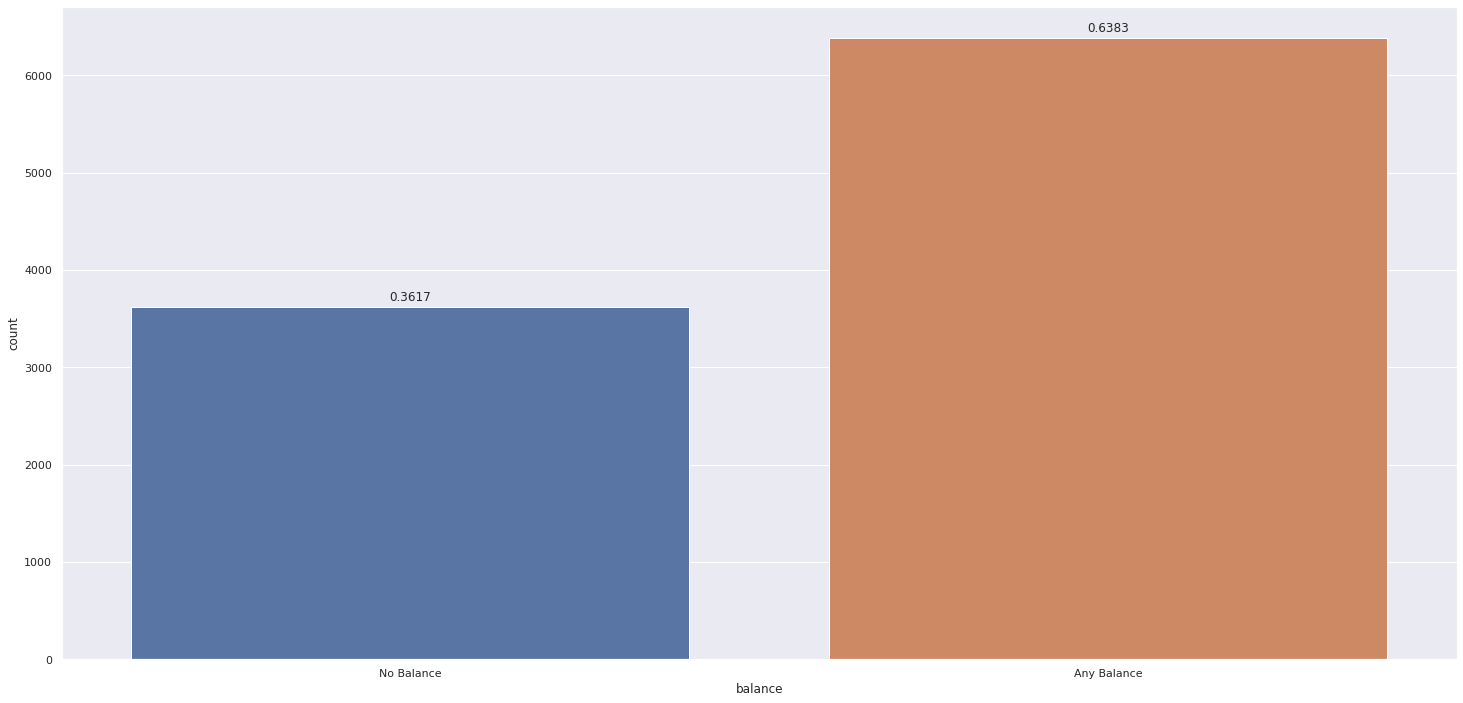

In [209]:
# count number of balance = 0 and balance > 0
aux_1 = df3['balance'].apply(lambda x: 'No Balance' if x == 0 else 'Any Balance')
plot_cat(aux_1)

#### 3.1.2.4 Estimated Salary
- The variable estimated salary is very balanced

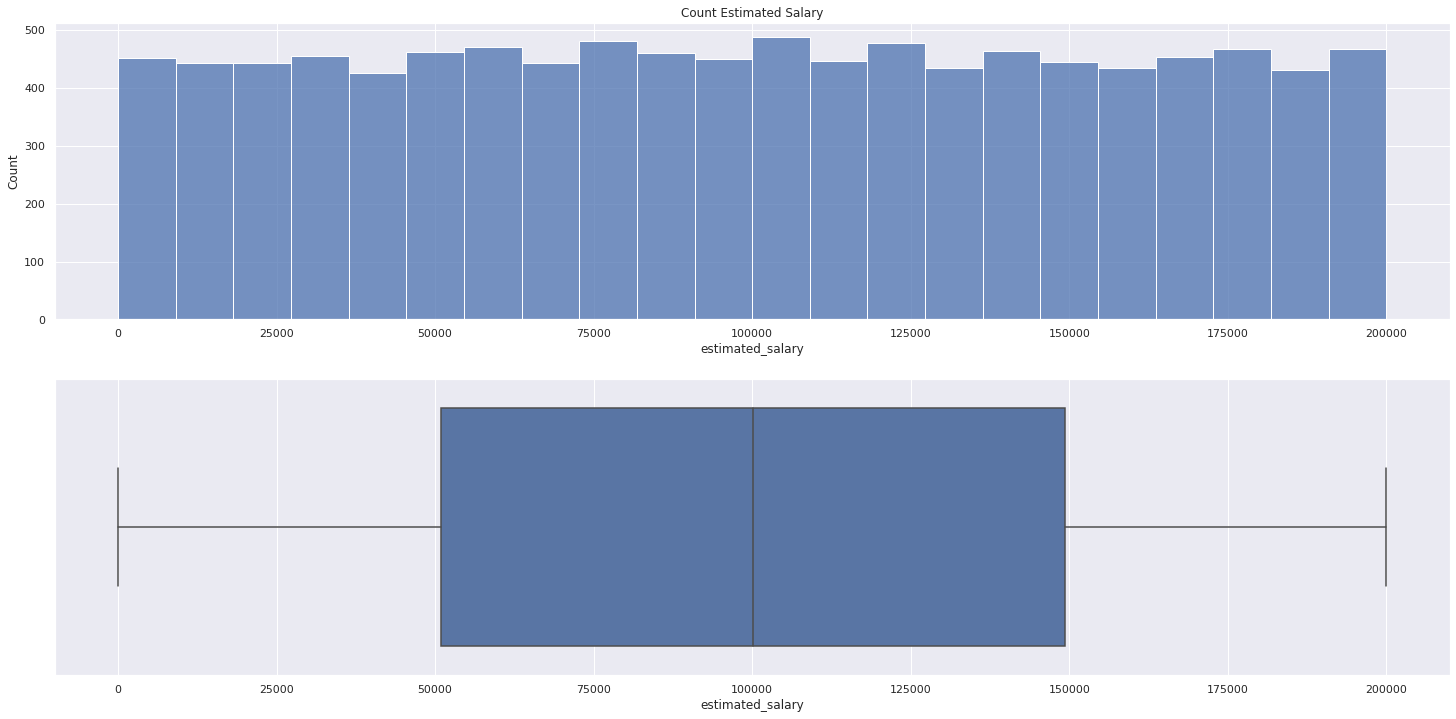

In [210]:
# plot balance with 0 balance values
plot_dist(df3['estimated_salary'], title='Count Estimated Salary')

#### 3.1.2.5 perc_tenure
- The skew of the variable perc_tenure is positive

- Values greater than 0.4 are outliers

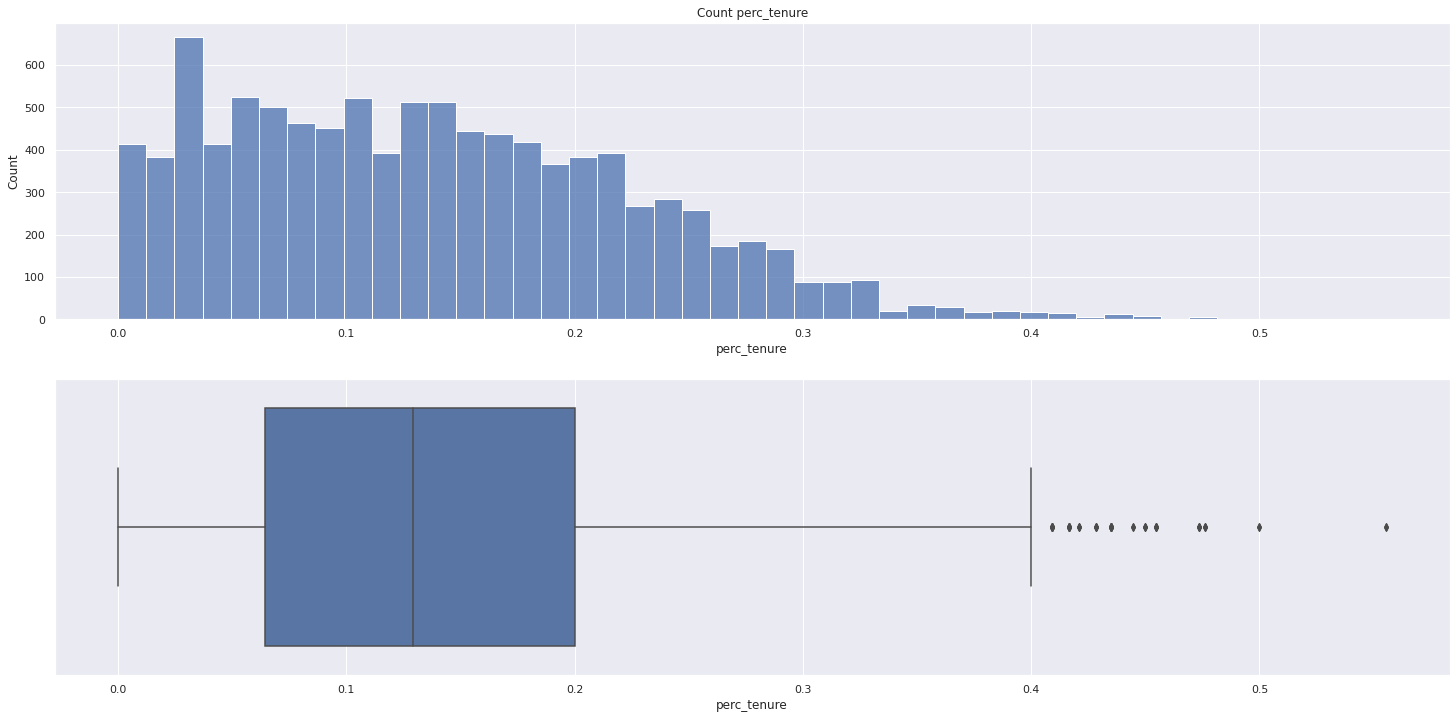

In [211]:
# plot perc_tenure
plot_dist(df3['perc_tenure'], title='Count perc_tenure')

#### 3.1.2.6 score_account
The distribution of the balance variable approach to normal, when without 0 values. But, your skew is positive.

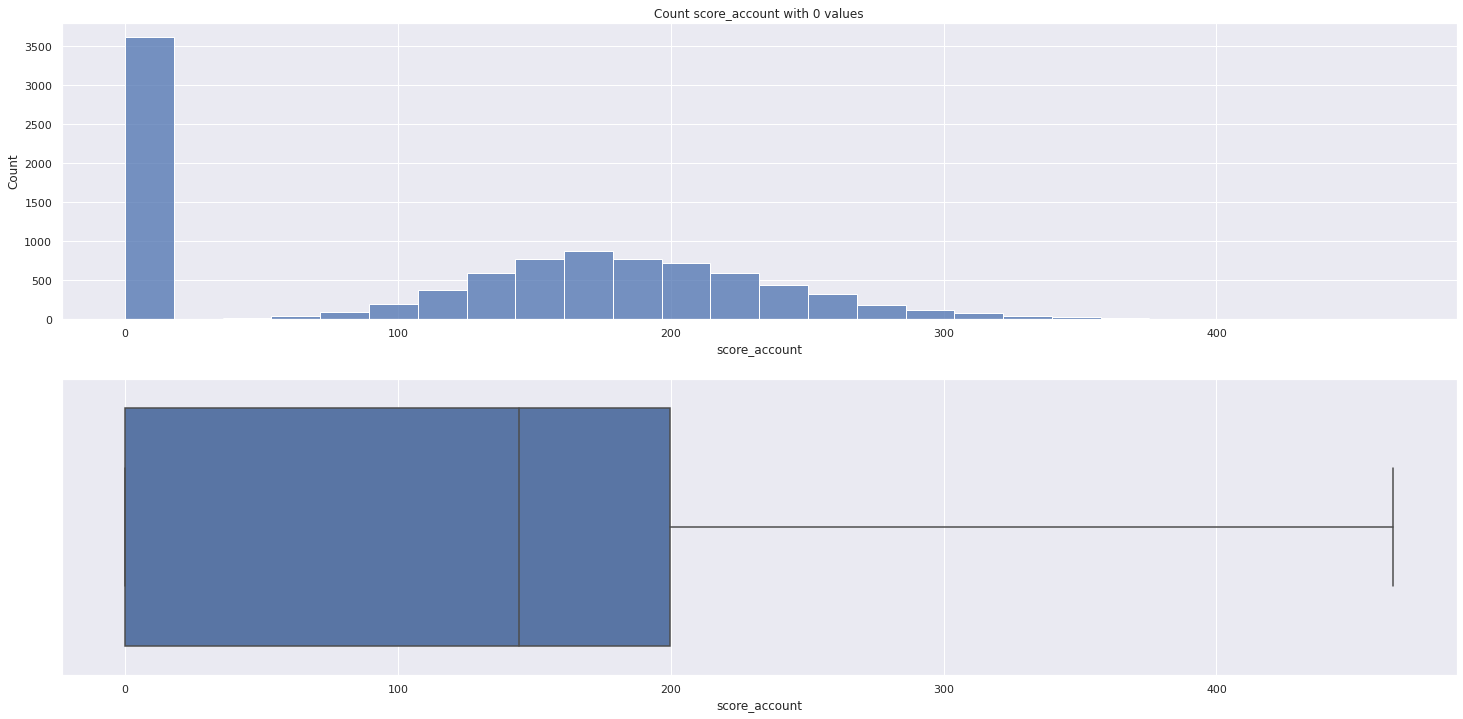

In [212]:
# plot score_account
plot_dist(df3['score_account'], title='Count score_account with 0 values')

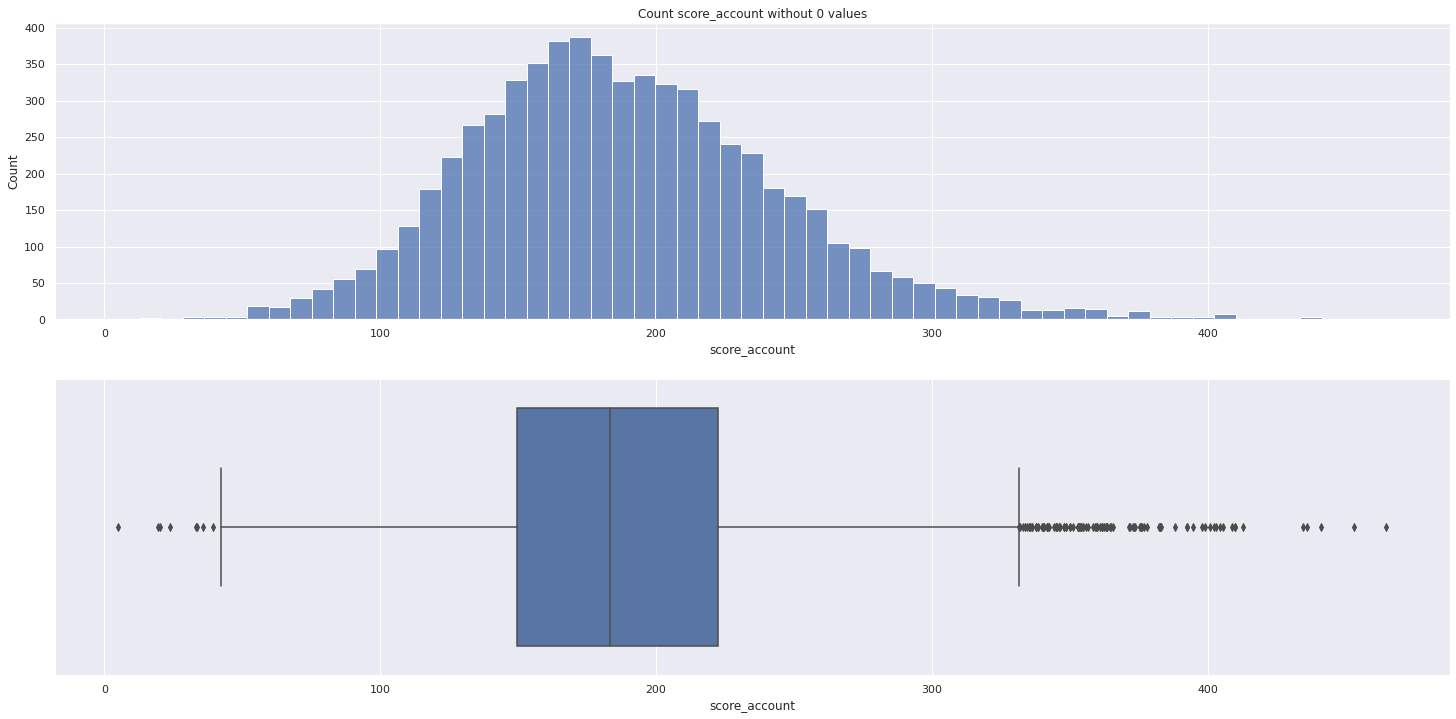

In [213]:
aux_2 = df3.loc[df3['score_account'] > 0, 'score_account']
plot_dist(aux_2, title='Count score_account without 0 values')

### 3.1.3. Categorical Variables

- More than half of the data are from French;

- More men than women;

- The time as a customer is well balanced, with the exception of the tips that are low;

- 95% of customers own up to 2 products;

- 70% of customers have a credit card;

- Approximately half of the customers are active, the other half are not.

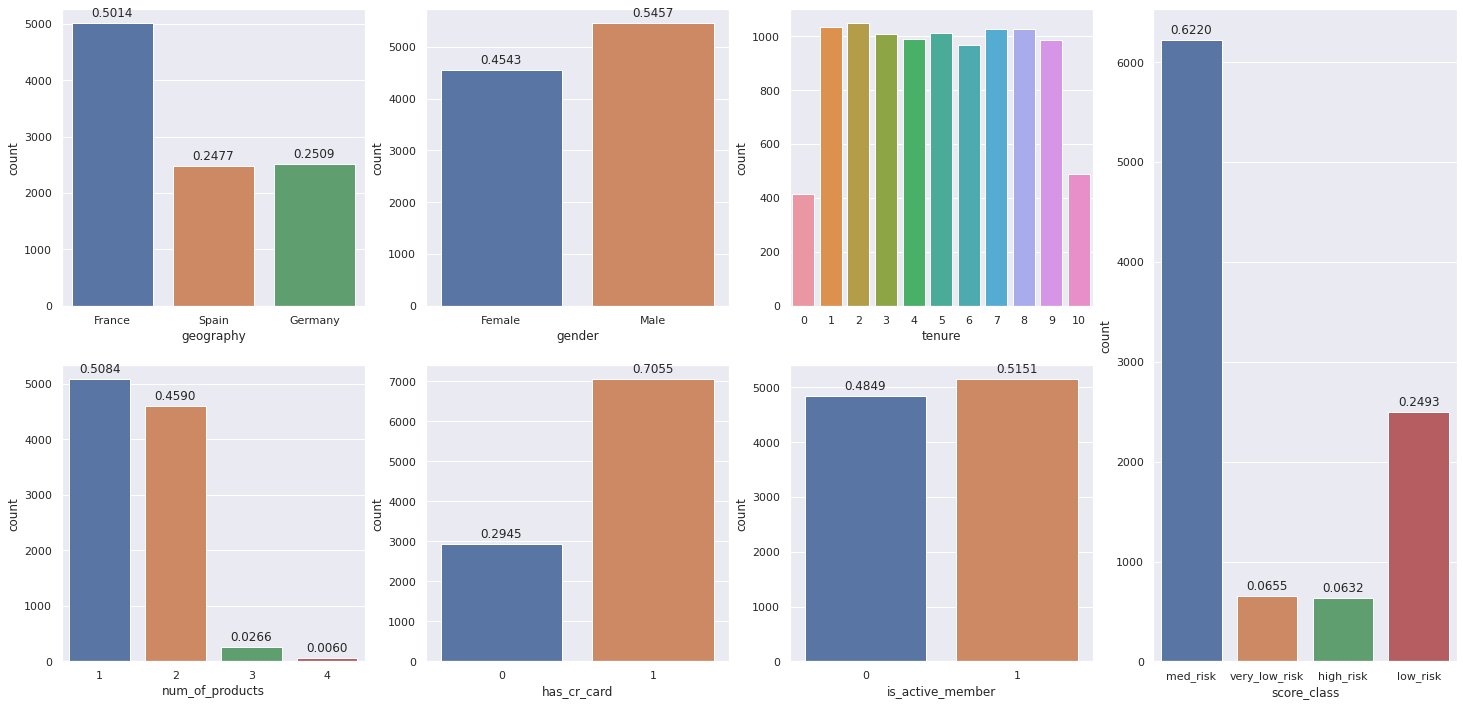

In [214]:
# create grid
grid = plt.GridSpec(2, 4)

# print countplot geography
plt.subplot(grid[0, 0])
plot_cat(cat_attributes['geography'])

# print countplot gender
plt.subplot(grid[0, 1])
plot_cat(cat_attributes['gender'])

# print countplot tenure
plt.subplot(grid[0, 2])
plot_cat(cat_attributes['tenure'], annot=False)

# print countplot num_of_products
plt.subplot(grid[1, 0])
plot_cat(cat_attributes['num_of_products'])

# print countplot has_cr_card
plt.subplot(grid[1, 1])
plot_cat(cat_attributes['has_cr_card'])

# print countplot is_active_member
plt.subplot(grid[1, 2])
plot_cat(cat_attributes['is_active_member'])

# print countplot is_active_member
plt.subplot(grid[:, 3])
plot_cat(df3['score_class'])

## 3.2. Bivariate Analysis

### H1. Old customers have a lower dropout rate than new customers. - True
Old customers have a slightly lower dropout rate than younger customers. However, the correlation between the variables is low.

In [411]:
# Create a crosstab with variables tenure and exited
aux = pd.crosstab(df3['tenure'], df3['exited']).reset_index()
aux['percentage'] = aux[1] / (aux[0] + aux[1])

In [412]:
aux

exited,tenure,0,1,percentage
0,0,318,95,0.230024
1,1,803,232,0.224155
2,2,847,201,0.191794
3,3,796,213,0.211100
4,4,786,203,0.205258
5,5,803,209,0.206522
6,6,771,196,0.202689
7,7,851,177,0.172179
8,8,828,197,0.192195
9,9,771,213,0.216463


<AxesSubplot:xlabel='exited', ylabel='exited'>

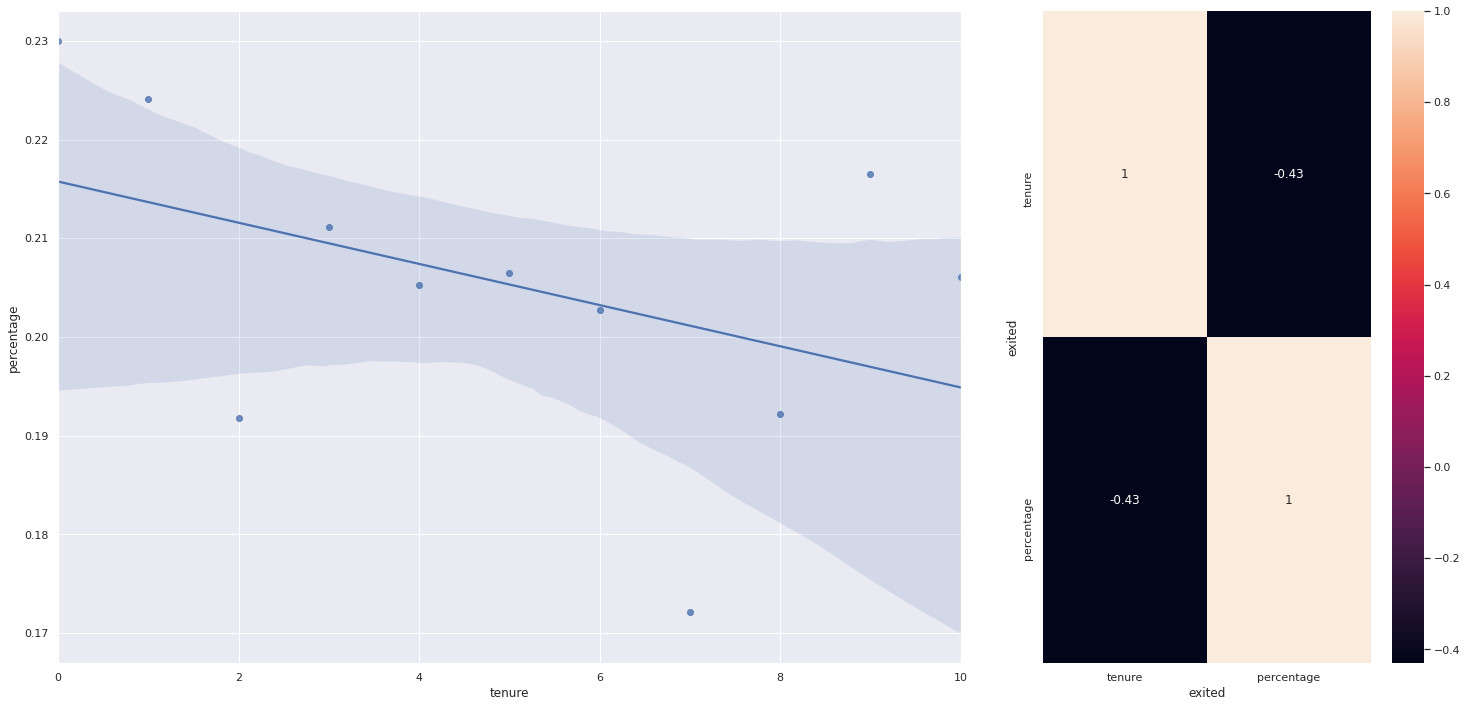

In [413]:
# create a grid
grid = plt.GridSpec(2, 3)

# subplot 2 -> regplot of percentage exit for tenure
plt.subplot(grid[:, :-1])
sns.regplot(y = aux['percentage'], x = aux['tenure'])

# subplot 3 -> correlation between tenure and percentage of exit
plt.subplot(grid[:, -1])
sns.heatmap(aux[['tenure', 'percentage']].corr(method='pearson'), annot=True)

### H2. Customers with more products evade less - FALSE
The number of products has a peculiar behavior:
- 27.71% of customers with 1 products evaded;
- 7.58% of customers with 2 products evaded;
- **82.71%** of customers with 3 products evaded;
- **100%** of customers with 4 products evaded.

Therefore, customers with more products tend to evade more.

In [401]:
# Create a crosstab with variables numer_of_products and exited
aux = pd.crosstab(df3['num_of_products'], df3['exited'])
aux['percentage'] = round(aux[1] / (aux[0] + aux[1]), 4) * 100

In [402]:
aux

exited,0,1,percentage
num_of_products,,,
1,3675,1409,27.71
2,4242,348,7.58
3,46,220,82.71
4,0,60,100.00


Text(0.5, 1.0, 'Evasion or not for all number of products')

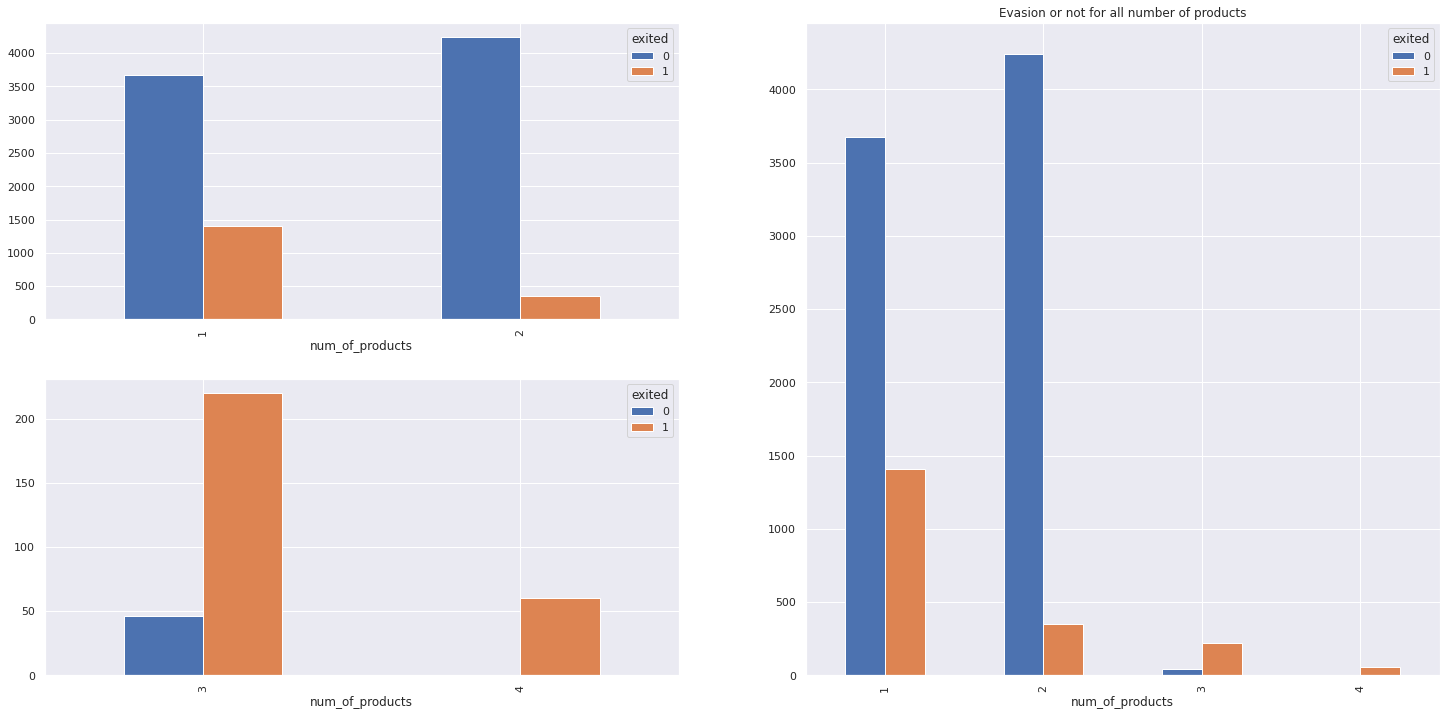

In [403]:
# create fig and grids
grid = plt.GridSpec(2, 2)
fig=plt.figure()
ax1=fig.add_subplot(grid[0, 0])
ax2=fig.add_subplot(grid[1, 0])
ax3=fig.add_subplot(grid[:, 1])

# 1 or 2 products
aux.iloc[:2, :-1].plot.bar(ax = ax1)

# 3 or 4 products
aux.iloc[2:, :-1].plot.bar(ax = ax2)

# all products
aux.iloc[:, :-1].plot.bar(ax = ax3)
plt.title('Evasion or not for all number of products')

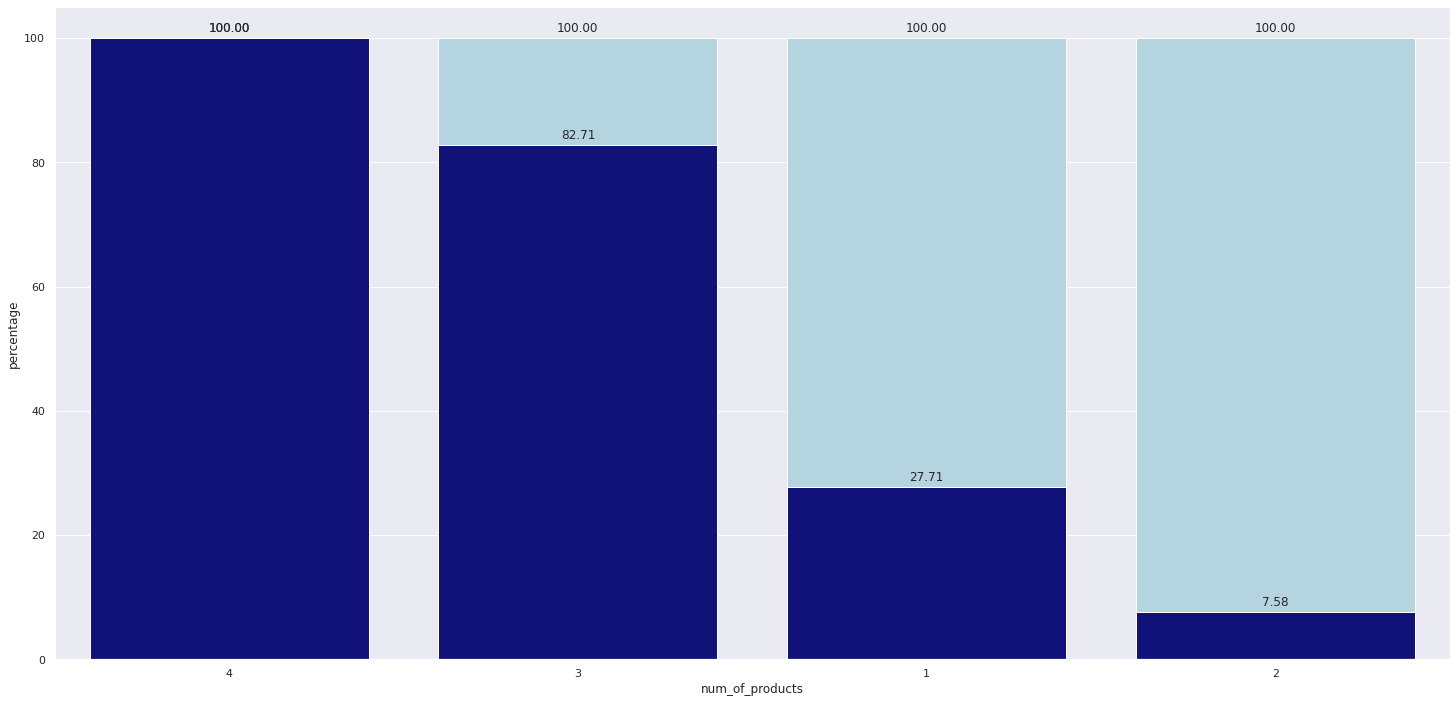

In [409]:
# auxiliar dataframe
aux_3 = pd.DataFrame({1: 100, 2: 100, 3: 100, 4: 100}, index=[0]).T.reset_index()

# plot percentage bar of each number of products
bar1 = sns.barplot(x=aux_3['index'], y=aux_3[0], order=[4, 3, 1, 2], color='lightblue')
bar2 = sns.barplot(x=aux.index, y=aux['percentage'], order=[4, 3, 1, 2], color='darkblue')


# annot
for p in bar2.patches:
            bar2.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', xytext = (0, 10), 
                           textcoords = 'offset points')

### H3. Customers with a greater number of products and longer usage times have lower than normal churn

In [419]:
aux = pd.crosstab(df3['exited'], [df3['tenure'], df3['num_of_products']]).T

<AxesSubplot:xlabel='tenure,num_of_products'>

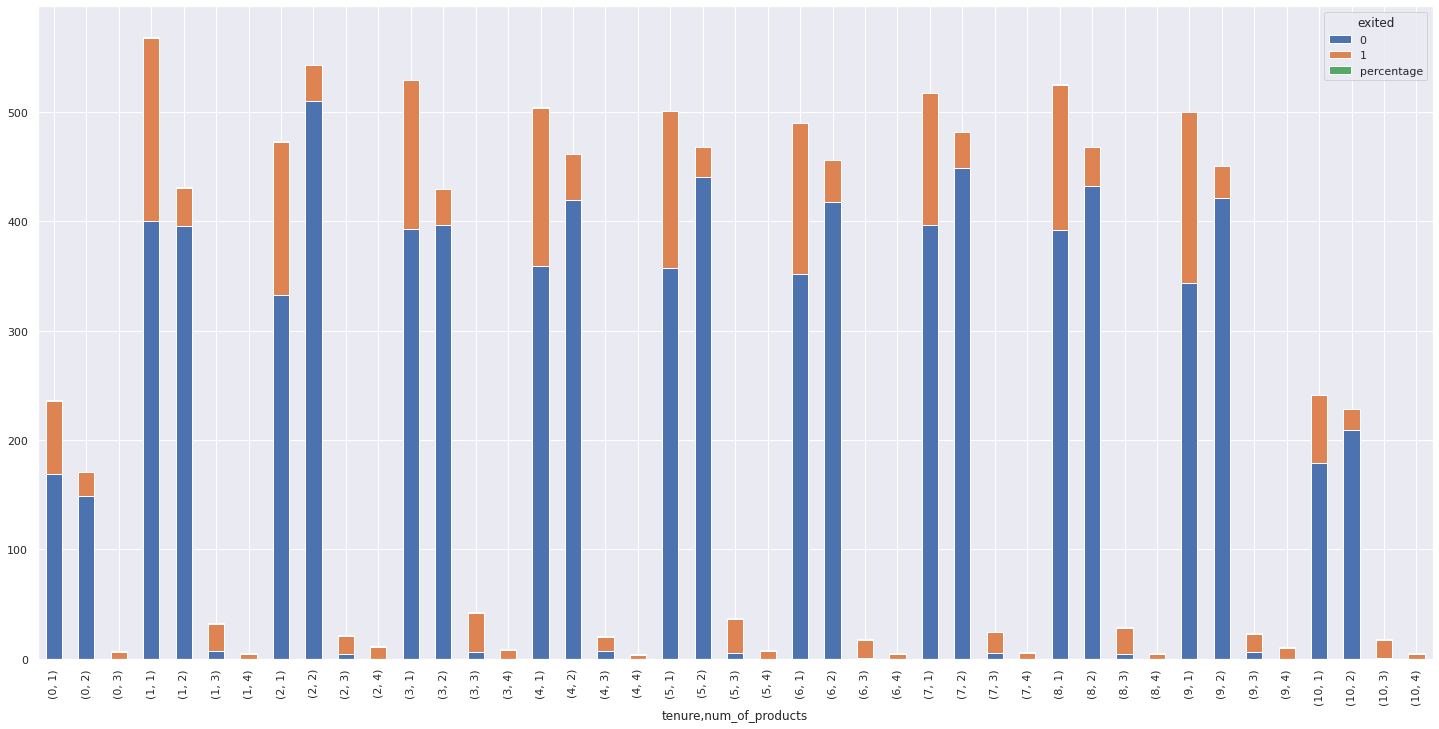

In [425]:
aux[].plot.bar(stacked=True)

In [423]:
aux['percentage'] = aux[1] / (aux[0] + aux[1]) 

In [424]:
aux

exited                    0    1  percentage
tenure num_of_products                      
0      1                169   67    0.283898
       2                149   22    0.128655
       3                  0    6    1.000000
1      1                400  168    0.295775
       2                396   35    0.081206
       3                  7   25    0.781250
       4                  0    4    1.000000
2      1                333  140    0.295983
       2                510   33    0.060773
       3                  4   17    0.809524
       4                  0   11    1.000000
3      1                393  136    0.257089
       2                397   33    0.076744
       3                  6   36    0.857143
       4                  0    8    1.000000
4      1                359  145    0.287698
       2                420   42    0.090909
       3                  7   13    0.650000
       4                  0    3    1.000000
5      1                357  144    0.287425
       2                441   27    0.057692
       3                  5   31    0.861111
       4                  0    7    1.000000
6      1                352  138    0.281633
       2                418   38    0.083333
       3                  1   16    0.941176
       4                  0    4    1.000000
7      1                397  120    0.232108
       2                449   33    0.068465
       3                  5   19    0.791667
       4                  0    5    1.000000
8      1                392  133    0.253333
       2                432   36    0.076923
       3                  4   24    0.857143
       4                  0    4    1.000000
9      1                344  156    0.312000
       2                421   30    0.066519
       3                  6   17    0.739130
       4                  0   10    1.000000
10     1                179   62    0.257261
       2                209   19    0.083333
       3                  1   16    0.941176
       4                  0    4    1.000000